# Introduction

In this project, I will be exploring the 2023 YTD NYPD Arrest Data*. I hope to present some summary statistics and create a visual representation of the data. I'm interested in answering the following questions, in particular:
 1. Which borough has the most felony arrest Year-to-Date?
 2. In the highest felony arrest borough, what are the top three crimes?

# Import Libraries & Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ezhang11/Python--NYPD-Arrest-Data-Analysis/main/NYPD_Arrest_Data__Year_to_Date_.csv')
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

*For additional footnotes on this dataset and descriptions of field names, 
<br> see document named __NYPD_Arrest_Incident_Level_Data_Footnotes.pdf__ in this repository.

Size down data to only retain necessary fields for this analysis:

In [3]:
df1 = df.loc[:,['PD_CD','PD_DESC','ARREST_DATE','LAW_CAT_CD','ARREST_BORO']]
df1

,PD_CD,PD_DESC,ARREST_DATE,LAW_CAT_CD,ARREST_BORO
0,105.0,STRANGULATION 1ST,02/07/2023,F,S
1,NaN,(null),01/04/2023,M,M
2,101.0,ASSAULT 3,01/10/2023,M,B
3,NaN,(null),02/27/2023,F,Q
4,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",01/07/2023,F,M
...,...,...,...,...,...
54571,105.0,STRANGULATION 1ST,03/20/2023,F,Q
54572,113.0,"MENACING,UNCLASSIFIED",03/20/2023,M,M
54573,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",03/13/2023,F,Q
54574,101.0,ASSAULT 3,03/17/2023,M,Q


This dataset contains arrest data from January 2023 to March 2023:

In [4]:
print("Minimum record date is on " + df1.ARREST_DATE.min())
print("Maximum record date is on " + df1.ARREST_DATE.max())

Minimum record date is on 01/01/2023
Maximum record date is on 03/31/2023


Data ordering & Remove missing values

In [5]:
#rename columns
df2 = df1.rename(columns = {'ARREST_DATE':'Arrest Date','LAW_CAT_CD':'Lvl of Offense', 
                            'ARREST_BORO':'Arrest Boro','PD_CD':'Class Code','PD_DESC':'Class Desc' })

#sort columns
df3 = df2[['Arrest Date','Arrest Boro','Lvl of Offense','Class Code','Class Desc']]

#drop missing values
df4=df3.dropna()

# Data Summaries & Visualizations

In [6]:
#create a subset of the data that only contains felony arrest info by borough
df_felony0 = df4.loc[(df4['Lvl of Offense'] == 'F')]
df_felony_by_boro = df_felony0[['Arrest Boro']]

#count felony arrest by borough
df_felony = df_felony_by_boro.value_counts(['Arrest Boro']).reset_index(name='count')
df_felony

,Arrest Boro,count
0,K,6887
1,M,5263
2,B,5154
3,Q,4945
4,S,987


The following pie-chart shows the felony arrest distributions by borough:

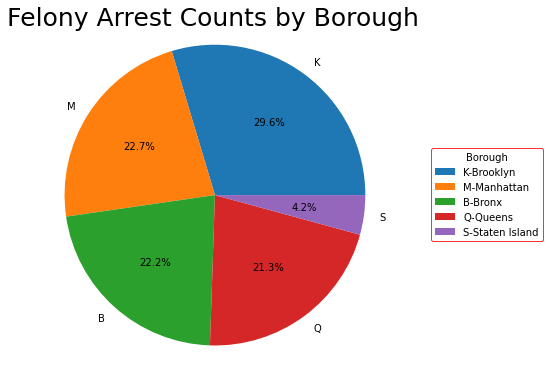

In [7]:
labels = df_felony['Arrest Boro']
felony_by_boro = df_felony['count']

plt.figure(figsize=(6,6))
plt.pie(felony_by_boro, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Felony Arrest Counts by Borough',fontsize = 25)
plt.legend(["K-Brooklyn", "M-Manhattan", "B-Bronx", "Q-Queens", "S-Staten Island"], 
           loc='center right', title='Borough', bbox_to_anchor=(1.5, 0.5), edgecolor = 'red')

We can see that Brooklyn has the most felony arrests YTD, followed by Manhattan. Staten Island has the lowest percentage of felony arrests.   

As concluded above, Brooklyn has the highest percentage of felony arrests YTD. Let's take a look at all crimes that resulted in a felony arrest in Brooklyn, ranked from most to least frequent:

In [8]:
df_bk_felony0 = df4.loc[(df4['Lvl of Offense'] == 'F')&(df4['Arrest Boro'] == 'K')]
df_bk_felony = df_bk_felony0[['Class Desc']]
df_bk_felony.value_counts(['Class Desc']).reset_index(name='count')

,Class Desc,count
0,"ASSAULT 2,1,UNCLASSIFIED",1043
1,"PUBLIC ADMINISTRATION,UNCLASSI",843
2,"ROBBERY,OPEN AREA UNCLASSIFIED",667
3,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",522
4,"BURGLARY,UNCLASSIFIED,UNKNOWN",493
...,...,...
75,COERCION 1,1
76,"DRUG PARAPHERNALIA, POSSESSE",1
77,KIDNAPPING 1,1
78,FALSE ALARM FIRE,1


The top three most common crimes that resulted in felony arrests in Brooklyn are: Assult, Public Administration, and Robbery.

# Conclusion

The data summaries and graph above suggests that Brooklyn has the highest percentage of felony arrests to date. We also learned that the top three felony crimes are Assult, Public Administration, and Robbery. Although this information might be useful for NYPD, it could be more beneficial analyze the felony arrest distributions with the population density and land size in mind. I believe the results would be more accurate if it is presented as "felony arrests per square mile", or "felony arrests per 1,000 residents". 